# THỰC HÀNH 2.3.3: DỰ ĐOÁN HÀNH VI KHÁCH HÀNG (NAIVE BAYES)

* **Dữ liệu:** Customer_Behaviour.csv
* **Mục tiêu:** Phân loại khách hàng có mua hàng (Purchased) hay không.

#### 1. Nhập thư viện và tải dữ liệu

In [39]:
# Import thư viieenj
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tải dữ liệu
data = pd.read_csv('Customer_Behaviour.csv')

# Hiển thị 5 dòng đầu tiên của dữ liệu
print("Dữ liệu gốc:")
display(data.head())

Dữ liệu gốc:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Phân tích dữ liệu ban đầu:**
* **Cấu trúc:** Dữ liệu bao gồm các thông tin nhân khẩu học (Gender, Age) và tài chính (EstimatedSalary).
* **Biến mục tiêu:** Cột Purchased là biến cần dự đoán, chứa giá trị 0 (Không mua) và 1 (Mua).
* **Vấn đề cần xử lý:**
    * Cột User ID là định danh duy nhất, không mang ý nghĩa dự đoán -> Cần loại bỏ.
    * Cột Gender đang ở dạng chữ (Male/Female) -> Cần mã hóa (Encoding) sang số để đưa vào mô hình.
    * Cột Age (đơn vị chục) và EstimatedSalary (đơn vị chục nghìn) chênh lệch thang đo rất lớn -> Cần chuẩn hóa (Scaling) để thuật toán Naive Bayes hoạt động hiệu quả.

#### 2. Xử lý dữ liệu trước khi xây dựng mô hình

In [45]:
# Loại bỏ các cột không liên quan (User ID)
if 'User ID' in data.columns:
    data = data.drop(columns=['User ID'], axis=1)

# Tiền xử lý: Mã hóa biến phân loại 'Gender' thành số
# (Bước này cần thiết vì Naive Bayes trong thư viện sklearn yêu cầu đầu vào là số)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Tách các đặc trưng (X) và nhãn mục tiêu (y)
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
# random_state=42 để kết quả cố định giống nhau mỗi lần chạy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (320, 3)
Kích thước tập kiểm tra: (80, 3)


**Đánh giá bước tiền xử lý:**
* **Kích thước:** Dữ liệu được chia theo tỷ lệ 80/20. Tập huấn luyện có 320 mẫu, tập kiểm tra có 80 mẫu
* **Số lượng đặc trưng:** Còn lại 3 cột đặc trưng (Gender, Age, EstimatedSalary) sau khi bỏ User ID

#### 3. Chuẩn hóa dữ liệu

In [46]:
# Khởi tạo bộ chuẩn hóa (Scaler)
sc = StandardScaler()

# Khớp và chuyển đổi dữ liệu huấn luyện (X_train)
X_train_scaled = sc.fit_transform(X_train)

# Chuyển đổi dữ liệu kiểm tra (X_test)
X_test_scaled = sc.transform(X_test)

# Hiển thị vài dòng dữ liệu sau khi chuẩn hóa
print("Dữ liệu Train sau khi chuẩn hóa (5 dòng đầu):")
print(X_train_scaled[:5])

Dữ liệu Train sau khi chuẩn hóa (5 dòng đầu):
[[-1.         -1.06675246 -0.38634438]
 [ 1.          0.79753468 -1.22993871]
 [-1.          0.11069205  1.853544  ]
 [-1.          0.60129393 -0.90995465]
 [-1.          1.87685881 -1.28811763]]


**Phân tích kết quả chuẩn hóa:**
* **Thay đổi giá trị:** Các giá trị ban đầu như 19000 hay 43000 đã được chuyển về khoảng nhỏ xung quanh 0 (ví dụ: -1.06, 0.79).
* **Ý nghĩa:** Việc đưa Age và EstimatedSalary về cùng một phân phối chuẩn (Standard Normal Distribution) là cực kỳ quan trọng*đối với thuật toán Gaussian Naive Bayes. Nếu không làm bước này, thuật toán có thể nhận định sai lầm rằng EstimatedSalary quan trọng hơn Age chỉ vì số của nó lớn hơn, dẫn đến mô hình kém chính xác.

#### 4. Xây dựng mô hình Naive Bayes

In [48]:
# Khởi tạo mô hình
# Sử dụng GaussianNB phù hợp cho dữ liệu số liên tục (Age, Salary)
classifier = GaussianNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện
classifier.fit(X_train_scaled, y_train)

GaussianNB()

#### 5. Đánh giá hiệu quả của mô hình

In [43]:
# Dự đoán trên dữ liệu kiểm tra
y_pred = classifier.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.94

Confusion Matrix:
[[50  2]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



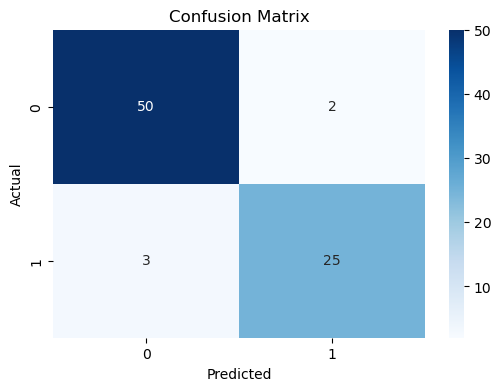

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Phân tích biểu đồ:**
* **Đường chéo chính (Màu đậm):** Hai ô [0,0] (số 50) và [1,1] (số 25) có màu xanh đậm nhất, thể hiện số lượng dự đoán đúng chiếm đa số áp đảo.
* **Đường chéo phụ (Màu nhạt):** Hai ô [0,1] và [1,0] có màu rất nhạt và số lượng nhỏ (2 và 3), thể hiện số lượng dự đoán sai là không đáng kể.
* **Kết luận:** Biểu đồ trực quan xác nhận mô hình Gaussian Naive Bayes hoạt động ổn định và **Đánh giá hiệu suất mô hình:**

1.  **Độ chính xác (Accuracy) - 94.00%:**
    * Mô hình dự đoán đúng 94% các trường hợp. Đây là kết quả **rất tốt** (Excellent) cho bài toán phân loại hành vi cơ bản này.

2.  **Ma trận nhầm lẫn:**
    * **50** trường hợp đúng là Không Mua (True Negative).
    * **25** trường hợp đúng là Có Mua (True Positive).
    * Chỉ có **5** trường hợp sai sót (2 False Positive, 3 False Negative). Tỷ lệ sai sót rất thấp.

3.  **Chỉ số Precision & Recall (Lớp 1 - Mua hàng):**
    * **Precision (0.93):** Khi máy báo khách sẽ mua, độ tin cậy lên tới 93%. Điều này giúp tối ưu chi phí Marketing, tránh lãng phí tiền quảng cáo vào khách không có nhu cầu.
    * **Recall (0.89):** Máy tìm ra được 89% khách hàng tiềm năng thực sự. Còn sót khoảng 11%, nhưng đây là mức chấp nhận được để đổi lấy độ chính xác cao.hiệu quả trên tập dữ liệu này.